In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlolympiadbd2025/sample_submission.csv
/kaggle/input/mlolympiadbd2025/train.csv
/kaggle/input/mlolympiadbd2025/metaData.csv
/kaggle/input/mlolympiadbd2025/test.csv


In [2]:
import pandas as pd

# Replace with the full path to your CSV file
train_file_path = "/kaggle/input/mlolympiadbd2025/train.csv"    
test_file_path="/kaggle/input/mlolympiadbd2025/test.csv"


# Read the CSV into a pandas DataFrame
train_df = pd.read_csv(train_file_path)
test_df=pd.read_csv(test_file_path)
threshold=100
train_df = train_df[~((train_df['RiskLevel'] == 0) & (train_df['BodyTemp'] > threshold))]

# Show the first few rows
print(train_df.head())

# Check basic info about the dataset
print(train_df.info())

    Id  Age  SystolicBP  DiastolicBP  Blood glucose  BodyTemp  HeartRate  \
0  617   31         120           60            6.1      98.0         76   
1  774   23         120           90            7.8      98.0         60   
2  610   13          90           65            7.5     101.0         80   
3  525   42         120           80            7.5      98.0         70   
4   70   26          85           60            6.0     101.0         86   

   RiskLevel  Usage  
0          0  Train  
1          1  Train  
2          2  Train  
3          0  Train  
4          1  Train  
<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 810
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             782 non-null    int64  
 1   Age            782 non-null    int64  
 2   SystolicBP     782 non-null    int64  
 3   DiastolicBP    782 non-null    int64  
 4   Blood glucose  782 non-null    float64
 5  

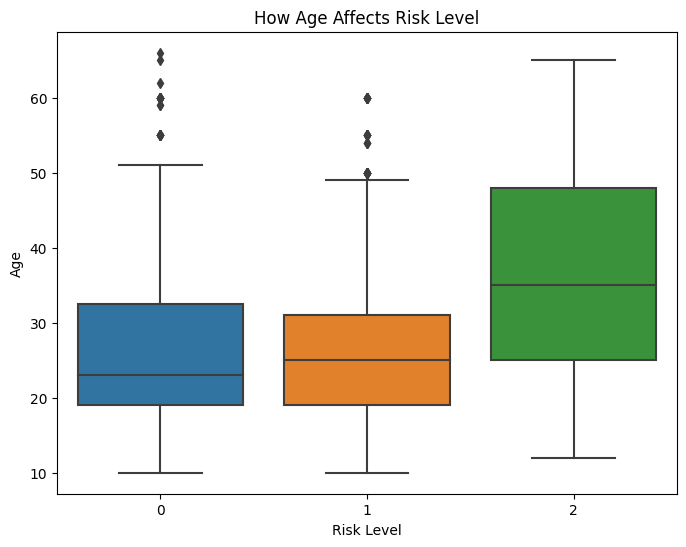

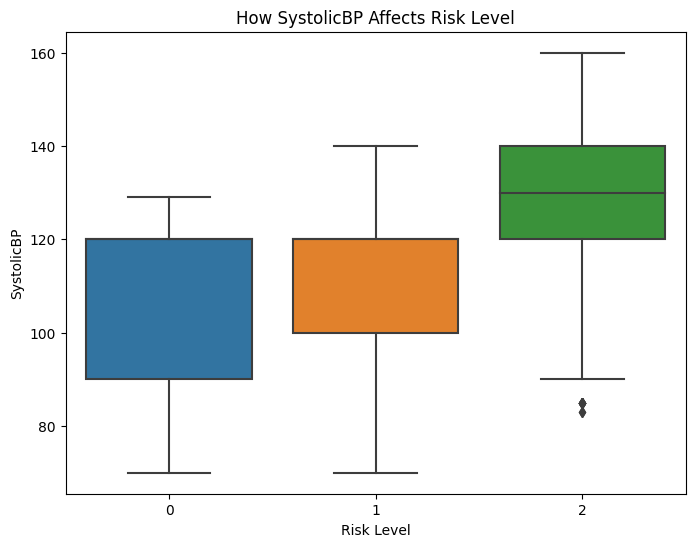

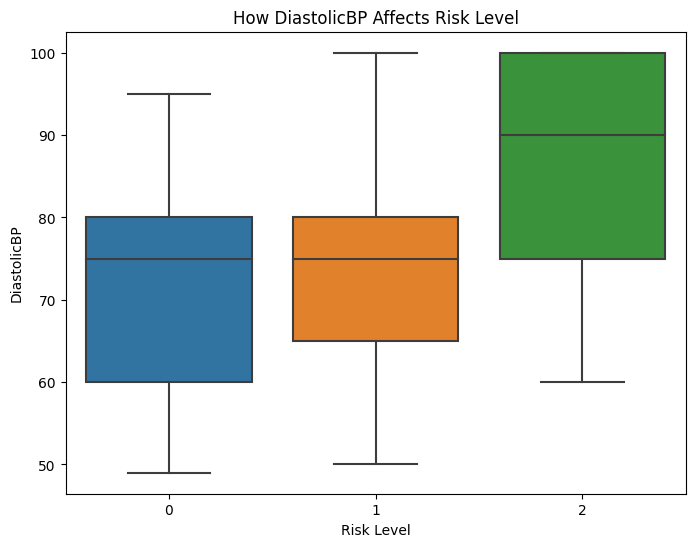

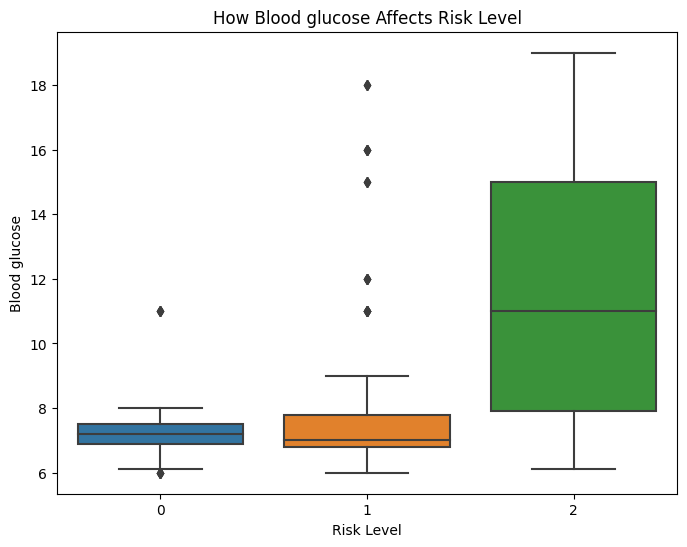

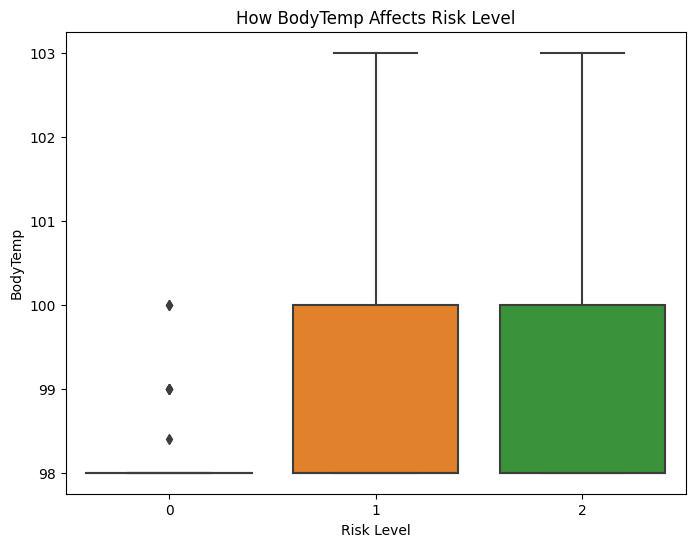

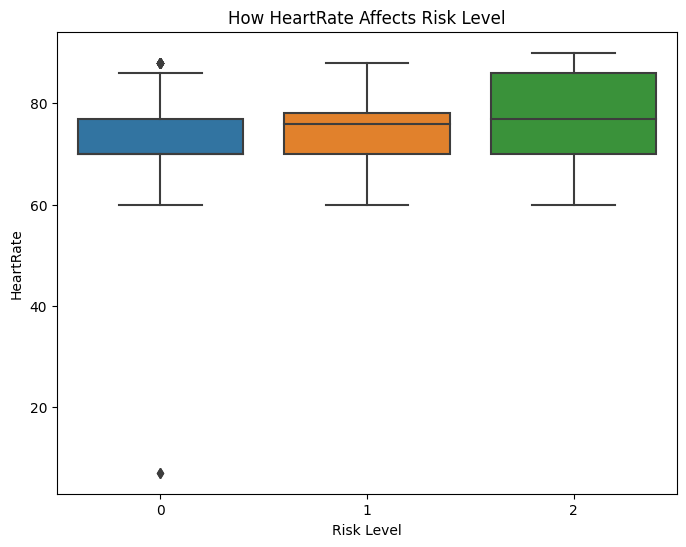

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_boxplot=train_df.drop(['Id','RiskLevel','Usage'],axis=1)

for i in range(len(df_boxplot.columns)):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RiskLevel', y=df_boxplot.columns[i], data=train_df)
    plt.xlabel("Risk Level")
    plt.ylabel(df_boxplot.columns[i])
    plt.title(f"How {df_boxplot.columns[i]} Affects Risk Level")
    plt.show()




In [4]:
#data splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train=train_df.drop(['Id','RiskLevel','Usage'],axis=1)
transform = StandardScaler()
X=transform.fit_transform(X_train)
y=train_df['RiskLevel']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [5]:
#logReg
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix,balanced_accuracy_score


parameters_logreg ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr=LogisticRegression()
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters_logreg, cv=10).fit(X_train,y_train)
print("best parameters: ", logreg_cv.best_params_)
print("LogReg accuracy: ", logreg_cv.best_score_)

yhat_lr=logreg_cv.predict(X_test)
print("Predictions accuracy: ", accuracy_score(y_test,yhat_lr))
print("f1: ", f1_score(y_test,yhat_lr,average='weighted'))
print("classification report: ",classification_report(y_test, yhat_lr))
balanced_acc = balanced_accuracy_score(y_test, yhat_lr)
print("Balanced accuracy:", balanced_acc)
cm1 = confusion_matrix(y_test, yhat_lr)


best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
LogReg accuracy:  0.6561187916026625
Predictions accuracy:  0.7006369426751592
f1:  0.6934061316169766
classification report:                precision    recall  f1-score   support

           0       0.67      0.86      0.75        58
           1       0.59      0.46      0.52        50
           2       0.86      0.76      0.80        49

    accuracy                           0.70       157
   macro avg       0.71      0.69      0.69       157
weighted avg       0.70      0.70      0.69       157

Balanced accuracy: 0.6923903354445226


In [6]:
#knn
from sklearn.neighbors import KNeighborsClassifier

parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(estimator=knn,param_grid=parameters_knn,cv=10).fit(X_train,y_train)
print('Best parameters: ', knn_cv.best_params_)
print('KNN accuracy: ', knn_cv.best_score_)

yhat_knn=knn_cv.predict(X_test)
print("Predictions accuracy: ", accuracy_score(y_test,yhat_knn))
print("f1: ", f1_score(y_test,yhat_knn,average='weighted'))
print("classification report: ",classification_report(y_test, yhat_knn))
balanced_acc = balanced_accuracy_score(y_test, yhat_knn)
print("Balanced accuracy:", balanced_acc)
cm2 = confusion_matrix(y_test, yhat_knn)


Best parameters:  {'algorithm': 'brute', 'n_neighbors': 1, 'p': 1}
KNN accuracy:  0.7951100870455708
Predictions accuracy:  0.8152866242038217
f1:  0.8175818708372253
classification report:                precision    recall  f1-score   support

           0       0.80      0.83      0.81        58
           1       0.72      0.78      0.75        50
           2       0.95      0.84      0.89        49

    accuracy                           0.82       157
   macro avg       0.83      0.81      0.82       157
weighted avg       0.82      0.82      0.82       157

Balanced accuracy: 0.8147736335913676


In [7]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

parameters_tree={'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree=DecisionTreeClassifier()
tree_cv=GridSearchCV(estimator=tree, param_grid=parameters_tree, cv=10).fit(X_train,y_train)
print('Best parameters: ', tree_cv.best_params_)
print('Decision Tree Accuracy: ', tree_cv.best_score_)
yhat_tree=tree_cv.predict(X_test)
print("Predictions accuracy: ", accuracy_score(y_test,yhat_tree))
print("f1: ", f1_score(y_test,yhat_tree,average='weighted'))
print("classification report: ",classification_report(y_test, yhat_tree))
balanced_acc = balanced_accuracy_score(y_test, yhat_tree)
print("Balanced accuracy:", balanced_acc)
cm3 = confusion_matrix(y_test, yhat_tree)


Best parameters:  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree Accuracy:  0.8000512032770098
Predictions accuracy:  0.8089171974522293
f1:  0.8113291475095319
classification report:                precision    recall  f1-score   support

           0       0.82      0.79      0.81        58
           1       0.71      0.82      0.76        50
           2       0.93      0.82      0.87        49

    accuracy                           0.81       157
   macro avg       0.82      0.81      0.81       157
weighted avg       0.82      0.81      0.81       157

Balanced accuracy: 0.8098099929627023


In [8]:
#SVM
from sklearn.svm import SVC

parameters_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'C': [0.1, 1, 10],  
    'gamma': ['scale', 'auto'] 
}
svm=SVC()

svm_cv=GridSearchCV(estimator=svm, param_grid=parameters_svm, cv=10).fit(X_train,y_train)
print('Best parameters: ', svm_cv.best_params_)
print('SVM accuracy: ',svm_cv.best_score_)

yhat_svm=svm_cv.predict(X_test)
print("Predictions accuracy: ", accuracy_score(y_test,yhat_svm))
print("f1: ", f1_score(y_test,yhat_svm,average='weighted'))
print("classification report: ",classification_report(y_test, yhat_svm))
balanced_acc = balanced_accuracy_score(y_test, yhat_svm)
print("Balanced accuracy:", balanced_acc)
cm4 = confusion_matrix(y_test, yhat_svm)


Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM accuracy:  0.7152073732718894
Predictions accuracy:  0.7388535031847133
f1:  0.7342212892059025
classification report:                precision    recall  f1-score   support

           0       0.68      0.90      0.77        58
           1       0.67      0.52      0.58        50
           2       0.93      0.78      0.84        49

    accuracy                           0.74       157
   macro avg       0.76      0.73      0.73       157
weighted avg       0.75      0.74      0.73       157

Balanced accuracy: 0.7306873094065213


In [9]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

parameters_randF = {
    'n_estimators': [100, 200,300,500],           
    'max_depth': [None, 20],              
    'min_samples_split': [2, 5],          
    'min_samples_leaf': [1, 2],           
    'max_features': ['sqrt'],            
    'bootstrap': [True],                   
    'criterion': ['gini'] }

randF=RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
RF_cv=GridSearchCV(estimator=randF, param_grid=parameters_randF, cv=10, n_jobs=-1).fit(X_train,y_train)

print('Best parameters: ', RF_cv.best_params_)
print('Random Forest Accuracy: ', RF_cv.best_score_)

yhat_randF=RF_cv.predict(X_test)

print("Predictions accuracy: ", accuracy_score(y_test,yhat_randF))
print("f1: ", f1_score(y_test,yhat_randF,average='weighted'))
print("classification report: ",classification_report(y_test, yhat_randF))
balanced_acc = balanced_accuracy_score(y_test, yhat_randF)
print("Balanced accuracy:", balanced_acc)
cm5 = confusion_matrix(y_test, yhat_randF)


Best parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy:  0.8256272401433691
Predictions accuracy:  0.8280254777070064
f1:  0.8298165536775522
classification report:                precision    recall  f1-score   support

           0       0.84      0.81      0.82        58
           1       0.74      0.84      0.79        50
           2       0.93      0.84      0.88        49

    accuracy                           0.83       157
   macro avg       0.84      0.83      0.83       157
weighted avg       0.84      0.83      0.83       157

Balanced accuracy: 0.829026507154586


In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

parameters_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

xgb_cv = GridSearchCV(estimator=xgb, param_grid=parameters_xgb, cv=5, n_jobs=-1, scoring='balanced_accuracy')
xgb_cv.fit(X_train, y_train)

print("XGBoost Best parameters:", xgb_cv.best_params_)
print("XGBoost Best balanced accuracy (CV):", xgb_cv.best_score_)

yhat_xgb = xgb_cv.predict(X_test)

print("XGBoost Balanced accuracy (Test):", balanced_accuracy_score(y_test, yhat_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, yhat_xgb))

cm6=confusion_matrix(y_test,yhat_xgb)

XGBoost Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}
XGBoost Best balanced accuracy (CV): 0.8109491750758451
XGBoost Balanced accuracy (Test): 0.8243349753694581
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        58
           1       0.72      0.84      0.78        50
           2       0.93      0.86      0.89        49

    accuracy                           0.82       157
   macro avg       0.83      0.82      0.82       157
weighted avg       0.83      0.82      0.82       157



In [11]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb



lgbm = LGBMClassifier(verbose=-1)
parameters_lgbm = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

lgbm_cv = GridSearchCV(estimator=lgbm, param_grid=parameters_lgbm, cv=5, n_jobs=-1, scoring='balanced_accuracy')
lgbm_cv.fit(X_train, y_train)
yhat_lgbm = xgb_cv.predict(X_test)

print("LightGBM Best parameters:", lgbm_cv.best_params_)
print("LightGBM Best balanced accuracy:", lgbm_cv.best_score_)
print("LightGBM Classification Report:\n", classification_report(y_test, yhat_lgbm))


cm7=confusion_matrix(y_test,yhat_lgbm)

LightGBM Best parameters: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}
LightGBM Best balanced accuracy: 0.8071744087556002
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        58
           1       0.72      0.84      0.78        50
           2       0.93      0.86      0.89        49

    accuracy                           0.82       157
   macro avg       0.83      0.82      0.82       157
weighted avg       0.83      0.82      0.82       157



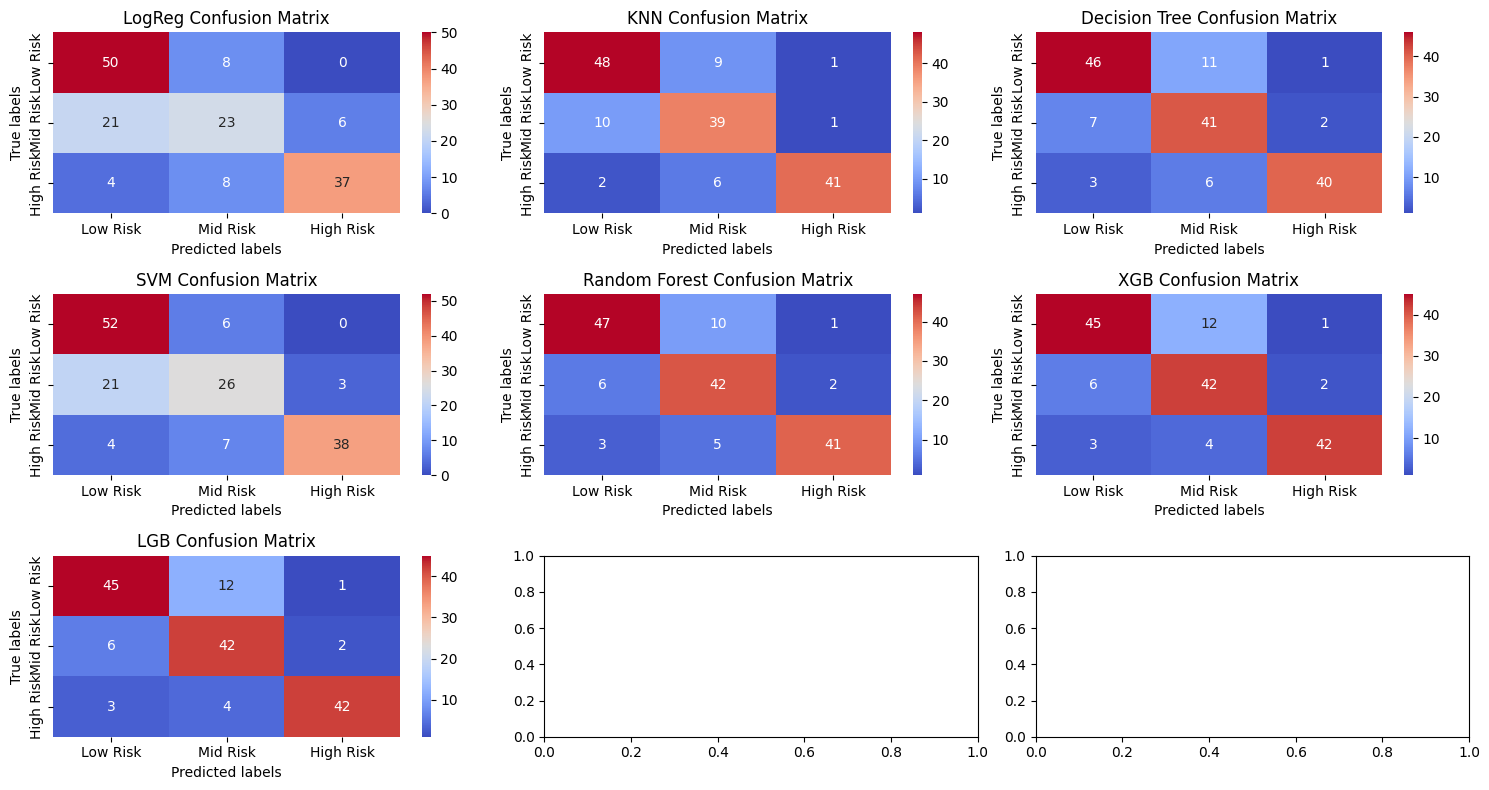

In [12]:
fig,axes=plt.subplots(3,3, figsize=(15,8))
ax0=sns.heatmap(cm1,ax=axes[0, 0], cmap='coolwarm',annot=True)
ax0.set_title('LogReg Confusion Matrix')
ax0.set_xlabel('Predicted labels')
ax0.set_ylabel('True labels')
ax0.xaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk']); ax0.yaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk'])

ax1=sns.heatmap(cm2,ax=axes[0, 1], cmap='coolwarm',annot=True)
ax1.set_title('KNN Confusion Matrix')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk']); ax1.yaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk'])

ax2=sns.heatmap(cm3,ax=axes[0, 2], cmap='coolwarm',annot=True)
ax2.set_title('Decision Tree Confusion Matrix')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk']); ax2.yaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk'])

ax3=sns.heatmap(cm4,ax=axes[1, 0], cmap='coolwarm',annot=True)
ax3.set_title('SVM Confusion Matrix')
ax3.set_xlabel('Predicted labels')
ax3.set_ylabel('True labels')
ax3.xaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk']); ax3.yaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk'])

ax4=sns.heatmap(cm5,ax=axes[1, 1], cmap='coolwarm',annot=True)
ax4.set_title('Random Forest Confusion Matrix')
ax4.set_xlabel('Predicted labels')
ax4.set_ylabel('True labels')
ax4.xaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk']); ax4.yaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk'])

ax5=sns.heatmap(cm6,ax=axes[1, 2], cmap='coolwarm',annot=True)
ax5.set_title('XGB Confusion Matrix')
ax5.set_xlabel('Predicted labels')
ax5.set_ylabel('True labels')
ax5.xaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk']); ax5.yaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk'])

ax6=sns.heatmap(cm7,ax=axes[2, 0], cmap='coolwarm',annot=True)
ax6.set_title('LGB Confusion Matrix')
ax6.set_xlabel('Predicted labels')
ax6.set_ylabel('True labels')
ax6.xaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk']); ax6.yaxis.set_ticklabels(['Low Risk', 'Mid Risk','High Risk'])

plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_per_fold = []

for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train[train_index], X_train[val_index]       # X_train é NumPy
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]  # y_train é pandas

    model = RF_cv.best_estimator_
    model.fit(X_tr, y_tr)

    y_pred_val = model.predict(X_val)

    classes = np.unique(y_val)
    acc_per_class = []

    for c in classes:
        idx = (y_val == c)
        acc = accuracy_score(y_val[idx], y_pred_val[idx])
        acc_per_class.append(acc)

    balanced_acc = np.mean(acc_per_class)
    acc_per_fold.append(balanced_acc)

print(f'Average balanced accuracy for Random Forest : {np.mean(acc_per_fold):.4f}')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_per_fold = []

for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train[train_index], X_train[val_index]       # X_train é NumPy
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]  # y_train é pandas

    model = xgb_cv.best_estimator_
    model.fit(X_tr, y_tr)

    y_pred_val = model.predict(X_val)

    classes = np.unique(y_val)
    acc_per_class = []

    for c in classes:
        idx = (y_val == c)
        acc = accuracy_score(y_val[idx], y_pred_val[idx])
        acc_per_class.append(acc)

    balanced_acc = np.mean(acc_per_class)
    acc_per_fold.append(balanced_acc)

print(f'Average balanced accuracy for XGB : {np.mean(acc_per_fold):.4f}')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_per_fold = []

for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train[train_index], X_train[val_index]       # X_train é NumPy
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]  # y_train é pandas

    model = lgbm_cv.best_estimator_
    model.fit(X_tr, y_tr)

    y_pred_val = model.predict(X_val)

    classes = np.unique(y_val)
    acc_per_class = []

    for c in classes:
        idx = (y_val == c)
        acc = accuracy_score(y_val[idx], y_pred_val[idx])
        acc_per_class.append(acc)

    balanced_acc = np.mean(acc_per_class)
    acc_per_fold.append(balanced_acc)
    results = lgbm_cv.cv_results_


print(f'Average balanced accuracy for lgbm : {np.mean(acc_per_fold):.4f}')

Average balanced accuracy for Random Forest : 0.8228
Average balanced accuracy for XGB : 0.8244
Average balanced accuracy for lgbm : 0.8232


In [14]:
X_test1 = test_df.drop(['Id','Usage'], axis=1)
print(f"Original test shape: {X_test1.shape}")

X_test1_transformed = transform.transform(X_test1)
print(f"Transformed test shape: {X_test1_transformed.shape}")

y_pred_test = RF_cv.best_estimator_.predict(X_test1_transformed)
print(f"Predictions shape: {len(y_pred_test)}")

submission_MA = pd.DataFrame({'Id': test_df['Id'], 'RiskLevel': y_pred_test})
submission_MA.to_csv('submission_MA.csv', index=False,header=True)
print('File successfully created')

Original test shape: (203, 6)
Transformed test shape: (203, 6)
Predictions shape: 203
File successfully created
